# Analyze Energy Consumption in Buildings¶

# 1. Setup

## 1.1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

## 1.2. Get Data

In [2]:
# Read in data into a DataFrame 
dfBlocPower = pd.read_csv('data/BlocPower_T.csv')
dfHDD = pd.read_csv('data/HDD-Features.csv')
dfCH = pd.read_csv('data/CDD-HDD-Features.csv')
dfSensor = pd.read_csv('data/CombinedSensorData.csv')
dfCluster = pd.read_csv('data/clusterEnergyLocation.csv') 

In [3]:
# Display top of DataFrame
dfBlocPower.head()
#dfHDD.head()
#dfCH.head()
#dfSensor.head()
#dfCluster.head()

,UTSUM_Electricity_Usage,INFO_Year of Construction,INFO_Number of Stories,INFO_Total Square Feet,PLEI_1_Quantity,PLEI_3_Quantity
0,"117,870 kWh",1955,4,"14,600",1.0,2
1,"16,207 kWh",1940,1,600,1.0,NaN
2,"15,564 kWh",1920,2,"6,000",2.0,1
3,"25,851 kWh",1965,1,"5,000",6.0,1
4,"32,343 kWh",1930,3,"4,196",1.0,1


In [4]:
dfHDD.head()

,domestic_gas,heating_gas
0,0.096226,0.366193
1,0.322600,0.579592
2,0.032706,0.036461
3,0.027504,0.234664
4,0.322600,0.579592


In [5]:
dfCH.head()

,Property Name,plug_load_consumption,ac_consumption,domestic_gas,heating_gas
0,ChurchofStCeciliaReport,11.651406,0.983531,0.096226,0.366193
1,69thLaneStudio,32.769884,5.008372,0.322600,0.579592
2,UnitarianChurchofStatenIsland,2.345049,0.296134,0.032706,0.036461
3,SSolowayandSonsPIPPrinting,4.618817,0.765189,0.027504,0.234664
4,SunnysideJewishCenterReport,9.323896,1.234326,0.322600,0.579592


In [6]:
dfCluster.head()

,AddressID,property_name,plug_load_consumption,ac_consumption,domestic_gas,heating_gas,kmeans_label,pca_1,pca_2,pca_3,...,Address,Zipcode,Long,Lat,Energy,Measured,Energy in KWH,Annual Energy Bill (USD),Predicted,ReClustering
0,125 East 105th Street10029,ChurchofStCeciliaReport,0.175057,0.066550,0.022770,0.122171,0,0.059555,0.070596,0.059555,...,125 East 105th Street,10029,-73.947326,40.791919,0.143237,0.309858,117869.99990,"$21,216.60",0.183957,0
1,69-71 Grand Avenue11378,69thLaneStudio,0.492353,0.338890,0.076336,0.193366,3,-0.334241,0.031453,-0.334241,...,69-71 Grand Avenue,11378,-73.893311,40.727435,0.393900,0.042605,16206.99982,"$2,917.26",0.027383,1
2,312 Fillmore St10301,UnitarianChurchofStatenIsland,0.035233,0.020038,0.007739,0.012164,0,0.197073,0.159979,0.197073,...,312 Fillmore St,10301,-74.098698,40.642981,0.037827,0.040915,15563.99981,"$2,801.52",0.036066,0
3,421 Doughty Blvd11096,SSolowayandSonsPIPPrinting,0.069396,0.051776,0.006508,0.078290,0,0.148448,0.097597,0.148448,...,421 Doughty Blvd,11096,-73.746996,40.622674,0.075395,0.067957,25850.99991,"$4,653.18",0.053783,0
4,40-20 47th Avenue11104,SunnysideJewishCenterReport,0.140087,0.083520,0.076336,0.193366,0,0.034552,0.007364,0.034552,...,40-20 47th Avenue,11104,-73.923901,40.741461,0.112403,0.085024,32342.99988,"$5,821.74",0.059363,0


In [7]:
# Get information from DataFrame
#dfBlocPower.info()
#dfHDD.info()
#dfCH.info()
#dfSensor.info()
dfCluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 21 columns):
AddressID                   103 non-null object
property_name               103 non-null object
plug_load_consumption       103 non-null float64
ac_consumption              103 non-null float64
domestic_gas                103 non-null float64
heating_gas                 103 non-null float64
kmeans_label                103 non-null int64
pca_1                       103 non-null float64
pca_2                       103 non-null float64
pca_3                       103 non-null float64
pca_3.1                     103 non-null float64
Address                     103 non-null object
Zipcode                     103 non-null int64
Long                        103 non-null float64
Lat                         103 non-null float64
Energy                      103 non-null float64
Measured                    103 non-null float64
Energy in KWH               103 non-null float64
Annual Energy Bill (

In [8]:
# Concatenate DataFrames along columns.
dfEnergy = pd.concat([dfBlocPower,dfCluster], axis=1)

dfEnergy.head()

,UTSUM_Electricity_Usage,INFO_Year of Construction,INFO_Number of Stories,INFO_Total Square Feet,PLEI_1_Quantity,PLEI_3_Quantity,AddressID,property_name,plug_load_consumption,ac_consumption,...,Address,Zipcode,Long,Lat,Energy,Measured,Energy in KWH,Annual Energy Bill (USD),Predicted,ReClustering
0,"117,870 kWh",1955,4,"14,600",1.0,2,125 East 105th Street10029,ChurchofStCeciliaReport,0.175057,0.066550,...,125 East 105th Street,10029,-73.947326,40.791919,0.143237,0.309858,117869.99990,"$21,216.60",0.183957,0
1,"16,207 kWh",1940,1,600,1.0,NaN,69-71 Grand Avenue11378,69thLaneStudio,0.492353,0.338890,...,69-71 Grand Avenue,11378,-73.893311,40.727435,0.393900,0.042605,16206.99982,"$2,917.26",0.027383,1
2,"15,564 kWh",1920,2,"6,000",2.0,1,312 Fillmore St10301,UnitarianChurchofStatenIsland,0.035233,0.020038,...,312 Fillmore St,10301,-74.098698,40.642981,0.037827,0.040915,15563.99981,"$2,801.52",0.036066,0
3,"25,851 kWh",1965,1,"5,000",6.0,1,421 Doughty Blvd11096,SSolowayandSonsPIPPrinting,0.069396,0.051776,...,421 Doughty Blvd,11096,-73.746996,40.622674,0.075395,0.067957,25850.99991,"$4,653.18",0.053783,0
4,"32,343 kWh",1930,3,"4,196",1.0,1,40-20 47th Avenue11104,SunnysideJewishCenterReport,0.140087,0.083520,...,40-20 47th Avenue,11104,-73.923901,40.741461,0.112403,0.085024,32342.99988,"$5,821.74",0.059363,0


## 1.3. Data Meaning

Now that your data is in memory, you can begin to explore and manipulate the data. By examining this data, you can understand patterns of energy usage and heat transfer as well as characteristics of building structures, operations, and occupant behavior that influence energy consumption. Begin by inspecting the first few rows of the BlocPower data. Each row has the following columns:
    
+ UTSUM_Electricity_Usage:   Annual energy usage of each building in measure in kWh
+ INFO_Year of Construction: Year when building was constructed
+ INFO_Number of Stories:    Number of stories of each building
+ INFO_Total Square Feet:    Square feet of each building
+ PLEI_1_Quantity:           Number of plugged equipment (e.g., microwaves, computers, ...)
+ PLEI_3_Quantity:           Same as PLEI_1 

## 1.4. Rename DataFrame's Columns

For processing convenience, columns of DataFrame are renamed:
    
+ Electricity_usage_KW/h:    energy
+ INFO_Year of Construction: age
+ INFO_Number of Stories:    number_stories
+ INFO_Total Square Feet:    square_feet
+ PLEI_1_Quantity:           plei_1
+ PLEI_3_Quantity:           plei_3

In [9]:
# Rename DataFrame's columns
dfEnergy = dfEnergy.rename(index=str, columns={
                                          "UTSUM_Electricity_Usage": "Energy_kWh", 
                                          "INFO_Year of Construction": "Year",
                                          "INFO_Number of Stories": "Number_Stories",
                                          "INFO_Total Square Feet": "Square_Feet",
                                          "PLEI_1_Quantity": "Plei_1",
                                          "PLEI_3_Quantity": "Plei_3",
                                          "AddressID": "Address_ID",
                                          "property_name": "Name",
                                          "plug_load_consumption": "Load_Norm",
                                          "ac_consumption": "AC_Norm",
                                          "domestic_gas": "Domestic_Gas",
                                          "heating_gas": "Heating_Gas",
                                          "Measured": "Energy_Norm",
                                          "Annual Energy Bill (USD)": "Annual_Bill",

                                         })
dfEnergy.head()

,Energy_kWh,Year,Number_Stories,Square_Feet,Plei_1,Plei_3,Address_ID,Name,Load_Norm,AC_Norm,...,Address,Zipcode,Long,Lat,Energy,Energy_Norm,Energy in KWH,Annual_Bill,Predicted,ReClustering
0,"117,870 kWh",1955,4,"14,600",1.0,2,125 East 105th Street10029,ChurchofStCeciliaReport,0.175057,0.066550,...,125 East 105th Street,10029,-73.947326,40.791919,0.143237,0.309858,117869.99990,"$21,216.60",0.183957,0
1,"16,207 kWh",1940,1,600,1.0,NaN,69-71 Grand Avenue11378,69thLaneStudio,0.492353,0.338890,...,69-71 Grand Avenue,11378,-73.893311,40.727435,0.393900,0.042605,16206.99982,"$2,917.26",0.027383,1
2,"15,564 kWh",1920,2,"6,000",2.0,1,312 Fillmore St10301,UnitarianChurchofStatenIsland,0.035233,0.020038,...,312 Fillmore St,10301,-74.098698,40.642981,0.037827,0.040915,15563.99981,"$2,801.52",0.036066,0
3,"25,851 kWh",1965,1,"5,000",6.0,1,421 Doughty Blvd11096,SSolowayandSonsPIPPrinting,0.069396,0.051776,...,421 Doughty Blvd,11096,-73.746996,40.622674,0.075395,0.067957,25850.99991,"$4,653.18",0.053783,0
4,"32,343 kWh",1930,3,"4,196",1.0,1,40-20 47th Avenue11104,SunnysideJewishCenterReport,0.140087,0.083520,...,40-20 47th Avenue,11104,-73.923901,40.741461,0.112403,0.085024,32342.99988,"$5,821.74",0.059363,0


# 2. Data Cleaning

## 2.1. Observations

+ On the first column (electricity usage), we need to reformat the values to get an actual number (e.g., 117,870 kWh to 117870)
+ On the 4th column (square feet), we need to get rid of the commas (e.g., 14,600 to 14600)
+ Notice that there are missing values

## 2.2. Remove Original NaN

In [10]:
# Remove missing values with dropna method
dfEnergy.dropna(inplace = True)

dfEnergy.head()

,Energy_kWh,Year,Number_Stories,Square_Feet,Plei_1,Plei_3,Address_ID,Name,Load_Norm,AC_Norm,...,Address,Zipcode,Long,Lat,Energy,Energy_Norm,Energy in KWH,Annual_Bill,Predicted,ReClustering
0,"117,870 kWh",1955,4,"14,600",1.0,2,125 East 105th Street10029,ChurchofStCeciliaReport,0.175057,0.066550,...,125 East 105th Street,10029,-73.947326,40.791919,0.143237,0.309858,117869.99990,"$21,216.60",0.183957,0
2,"15,564 kWh",1920,2,"6,000",2.0,1,312 Fillmore St10301,UnitarianChurchofStatenIsland,0.035233,0.020038,...,312 Fillmore St,10301,-74.098698,40.642981,0.037827,0.040915,15563.99981,"$2,801.52",0.036066,0
3,"25,851 kWh",1965,1,"5,000",6.0,1,421 Doughty Blvd11096,SSolowayandSonsPIPPrinting,0.069396,0.051776,...,421 Doughty Blvd,11096,-73.746996,40.622674,0.075395,0.067957,25850.99991,"$4,653.18",0.053783,0
4,"32,343 kWh",1930,3,"4,196",1.0,1,40-20 47th Avenue11104,SunnysideJewishCenterReport,0.140087,0.083520,...,40-20 47th Avenue,11104,-73.923901,40.741461,0.112403,0.085024,32342.99988,"$5,821.74",0.059363,0
5,"106,938 kWh",1910,1,"2,200",2.0,1,361 6th Ave10014,MoonbluIncdbaJoyBurgerBar,0.678719,0.570930,...,361 6th Ave,10014,-74.000832,40.732327,0.708832,0.281120,106938.00010,"$19,248.84",0.189959,1


In [11]:
dfEnergy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 102
Data columns (total 27 columns):
Energy_kWh        80 non-null object
Year              80 non-null object
Number_Stories    80 non-null int64
Square_Feet       80 non-null object
Plei_1            80 non-null float64
Plei_3            80 non-null object
Address_ID        80 non-null object
Name              80 non-null object
Load_Norm         80 non-null float64
AC_Norm           80 non-null float64
Domestic_Gas      80 non-null float64
Heating_Gas       80 non-null float64
kmeans_label      80 non-null int64
pca_1             80 non-null float64
pca_2             80 non-null float64
pca_3             80 non-null float64
pca_3.1           80 non-null float64
Address           80 non-null object
Zipcode           80 non-null int64
Long              80 non-null float64
Lat               80 non-null float64
Energy            80 non-null float64
Energy_Norm       80 non-null float64
Energy in KWH     80 non-null float64
An

## 2.3. Remove Columns 

In [12]:
# Remove columns that should not have focus in the statistical models
dfEnergy.drop(['kmeans_label', 'pca_1', 'pca_2', 'pca_3', 'pca_3.1', 'Address_ID', 
               'Address', 'Zipcode', 'Energy', 'Energy in KWH', 
               'Predicted', 'ReClustering'], axis=1, inplace=True)

dfEnergy.head()

,Energy_kWh,Year,Number_Stories,Square_Feet,Plei_1,Plei_3,Name,Load_Norm,AC_Norm,Domestic_Gas,Heating_Gas,Long,Lat,Energy_Norm,Annual_Bill
0,"117,870 kWh",1955,4,"14,600",1.0,2,ChurchofStCeciliaReport,0.175057,0.066550,0.022770,0.122171,-73.947326,40.791919,0.309858,"$21,216.60"
2,"15,564 kWh",1920,2,"6,000",2.0,1,UnitarianChurchofStatenIsland,0.035233,0.020038,0.007739,0.012164,-74.098698,40.642981,0.040915,"$2,801.52"
3,"25,851 kWh",1965,1,"5,000",6.0,1,SSolowayandSonsPIPPrinting,0.069396,0.051776,0.006508,0.078290,-73.746996,40.622674,0.067957,"$4,653.18"
4,"32,343 kWh",1930,3,"4,196",1.0,1,SunnysideJewishCenterReport,0.140087,0.083520,0.076336,0.193366,-73.923901,40.741461,0.085024,"$5,821.74"
5,"106,938 kWh",1910,1,"2,200",2.0,1,MoonbluIncdbaJoyBurgerBar,0.678719,0.570930,0.902417,0.224655,-74.000832,40.732327,0.281120,"$19,248.84"


## 2.4. Define Cleaning Functions

Run the following cell to define different functions that you can run to clean and prepare the data. For example, define functions to convert kWh values to actual numbers, to calculate the age of a building based on the year the building was constructed, to remove commas in returned values, and to interpret missing values in the PLEI columns as meaning that there is no plugged-in equipment.

In [13]:
# Cleaning function for 'Energy' data
# Reformat the values to get an actual number (e.g., 117,870 kWh to 117870)
def clean_energy(v): 
    if (v=='') or v==None: return np.nan
    v = v.split(' ')[0].replace(',','')
    return np.nan if(v=='') else float(v)

# Function for cleaning 'Year' data 
# Compute the age of a buildings, given the year of construction
def clean_age(v):
    if (v=='') or v==None: return np.nan
    v = v
    return (2018 - float(v)) if(len(v)==4) else np.nan

# Function for cleaning 'Number_Stories' data
def clean_stories(v):
    if (v=='') or v==None: return np.nan
    return float(v)

# Function for cleaning 'Square_Feet' data
# Get rid of commas 
def clean_sqFeet(v):
    if (v=='') or v==None: return np.nan
    v = v.replace(',','')
    return np.nan if(v=='') else float(v) 

# Function for cleaning 'Plei_1' and 'Plei_3' data
# in the 'Plei_1' and 'Plei_3' columns, missing values can be interpeted as 0 plugged equipment
def clean_plei(v): 
    try:
        vv = float(v)
    except:
        vv = 0.0
    return vv

# Cleaning function for 'Annual_Bill' data
# Reformat the values to get an actual number (e.g., $21,216.60 to 21216.60)
def clean_bill(v): 
    if (v=='') or v==None: return np.nan
    v = v.replace('$','')
    v = v.replace(',','')
    return np.nan if(v=='') else float(v)

## 2.5. Apply Cleaning Functions

Apply cleaning functions to each columns of DataFrame

In [14]:
# Apply cleaning function to the 'Energy' data
dfEnergy['Energy_kWh'] = dfEnergy['Energy_kWh'].map(lambda x: clean_energy(x))

# Apply cleaning function to the 'Year' data
dfEnergy['Year'] = dfEnergy['Year'].map(lambda x: clean_age(x))
# change 'Year' column name to 'Age'
dfEnergy.rename(columns={'Year':'Age'}, inplace=True)

# Apply cleaning function to the 'Number_Stories' data
dfEnergy['Number_Stories'] = dfEnergy['Number_Stories'].map(lambda x: clean_stories(x))

# Apply cleaning function to the 'Square_Feet' data
dfEnergy['Square_Feet'] = dfEnergy['Square_Feet'].map(lambda x: clean_sqFeet(x))

# Apply cleaning function to the 'Plei_1' data
dfEnergy['Plei_1'] = dfEnergy['Plei_1'].map(lambda x: clean_plei(x))

# Apply cleaning function to the 'Plei_3' data
dfEnergy['Plei_3'] =dfEnergy['Plei_3'].map(lambda x: clean_plei(x))

# Apply cleaning function to the 'plei_3' data
dfEnergy['Annual_Bill'] =dfEnergy['Annual_Bill'].map(lambda x: clean_bill(x))

## 2.6. Remove Final NaN

In [15]:
# Remove missing values with dropna method
dfEnergy.dropna(inplace = True)

dfEnergy.head()

,Energy_kWh,Age,Number_Stories,Square_Feet,Plei_1,Plei_3,Name,Load_Norm,AC_Norm,Domestic_Gas,Heating_Gas,Long,Lat,Energy_Norm,Annual_Bill
0,117870.0,63.0,4.0,14600.0,1.0,2.0,ChurchofStCeciliaReport,0.175057,0.066550,0.022770,0.122171,-73.947326,40.791919,0.309858,21216.60
2,15564.0,98.0,2.0,6000.0,2.0,1.0,UnitarianChurchofStatenIsland,0.035233,0.020038,0.007739,0.012164,-74.098698,40.642981,0.040915,2801.52
3,25851.0,53.0,1.0,5000.0,6.0,1.0,SSolowayandSonsPIPPrinting,0.069396,0.051776,0.006508,0.078290,-73.746996,40.622674,0.067957,4653.18
4,32343.0,88.0,3.0,4196.0,1.0,1.0,SunnysideJewishCenterReport,0.140087,0.083520,0.076336,0.193366,-73.923901,40.741461,0.085024,5821.74
5,106938.0,108.0,1.0,2200.0,2.0,1.0,MoonbluIncdbaJoyBurgerBar,0.678719,0.570930,0.902417,0.224655,-74.000832,40.732327,0.281120,19248.84


In [16]:
dfEnergy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 102
Data columns (total 15 columns):
Energy_kWh        76 non-null float64
Age               76 non-null float64
Number_Stories    76 non-null float64
Square_Feet       76 non-null float64
Plei_1            76 non-null float64
Plei_3            76 non-null float64
Name              76 non-null object
Load_Norm         76 non-null float64
AC_Norm           76 non-null float64
Domestic_Gas      76 non-null float64
Heating_Gas       76 non-null float64
Long              76 non-null float64
Lat               76 non-null float64
Energy_Norm       76 non-null float64
Annual_Bill       76 non-null float64
dtypes: float64(14), object(1)
memory usage: 9.5+ KB


# 3. Database

In [17]:
# Remove columns that should not have focus in the statistical models
dfEnergy.drop(['Name', 'Long', 'Lat', 'Energy_Norm', 'Annual_Bill'], axis=1, inplace=True)

dfEnergy.head()

,Energy_kWh,Age,Number_Stories,Square_Feet,Plei_1,Plei_3,Load_Norm,AC_Norm,Domestic_Gas,Heating_Gas
0,117870.0,63.0,4.0,14600.0,1.0,2.0,0.175057,0.066550,0.022770,0.122171
2,15564.0,98.0,2.0,6000.0,2.0,1.0,0.035233,0.020038,0.007739,0.012164
3,25851.0,53.0,1.0,5000.0,6.0,1.0,0.069396,0.051776,0.006508,0.078290
4,32343.0,88.0,3.0,4196.0,1.0,1.0,0.140087,0.083520,0.076336,0.193366
5,106938.0,108.0,1.0,2200.0,2.0,1.0,0.678719,0.570930,0.902417,0.224655


In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# Import sqlite library
import sqlite3
from sqlite3 import Error

In [20]:
# Function to create a sqlite db
def sqlite_conn(db_file):
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        conn.close()

In [21]:
# Create a sqlite connection
sqlite_conn('energy.sqlite')

2.6.0


In [22]:
# Connect to the SQLAlchemy by using create_engine() function
engine = create_engine("sqlite:///energy.sqlite")

In [23]:
# Write records stored in a DataFrame to a SQL database.
dfEnergy.to_sql('energy', engine, if_exists = 'replace')

# 4. Correlation Model

## 4.1. Select DataFrame

In [24]:
'''
# Remove columns that should not have focus in the statistical models
dfEnergy.drop(['Name', 'Long', 'Lat', 'Energy_Norm', 'Annual_Bill'], axis=1, inplace=True)

dfEnergy.head()
'''

"\n# Remove columns that should not have focus in the statistical models\ndfEnergy.drop(['Name', 'Long', 'Lat', 'Energy_Norm', 'Annual_Bill'], axis=1, inplace=True)\n\ndfEnergy.head()\n"

## 4.2. Normalize DataFrame Values 

In [25]:
from sklearn import preprocessing

# 
cols = dfEnergy.columns
scaler = preprocessing.MaxAbsScaler()

# 
dfEnergy = scaler.fit_transform(dfEnergy)
dfScaled = pd.DataFrame(dfEnergy,columns=cols)

dfScaled.head()

,Energy_kWh,Age,Number_Stories,Square_Feet,Plei_1,Plei_3,Load_Norm,AC_Norm,Domestic_Gas,Heating_Gas
0,0.309858,0.368421,1.00,0.224615,0.025,0.074074,0.175057,0.066692,0.022770,0.122171
1,0.040915,0.573099,0.50,0.092308,0.050,0.037037,0.035233,0.020080,0.007739,0.012164
2,0.067957,0.309942,0.25,0.076923,0.150,0.037037,0.069396,0.051886,0.006508,0.078290
3,0.085024,0.514620,0.75,0.064554,0.025,0.037037,0.140087,0.083698,0.076336,0.193366
4,0.281120,0.631579,0.25,0.033846,0.050,0.037037,0.678719,0.572141,0.902417,0.224655


## 4.3. Data Distribution

We can have a look on the data distribution from DataFrame using the distribution plot of seaborn, a Python library for making statistical visualizations.

C:\Users\Yves-Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yves-Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yves-Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yves-Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Yves-Andre\Anaconda3\lib\site-packages\

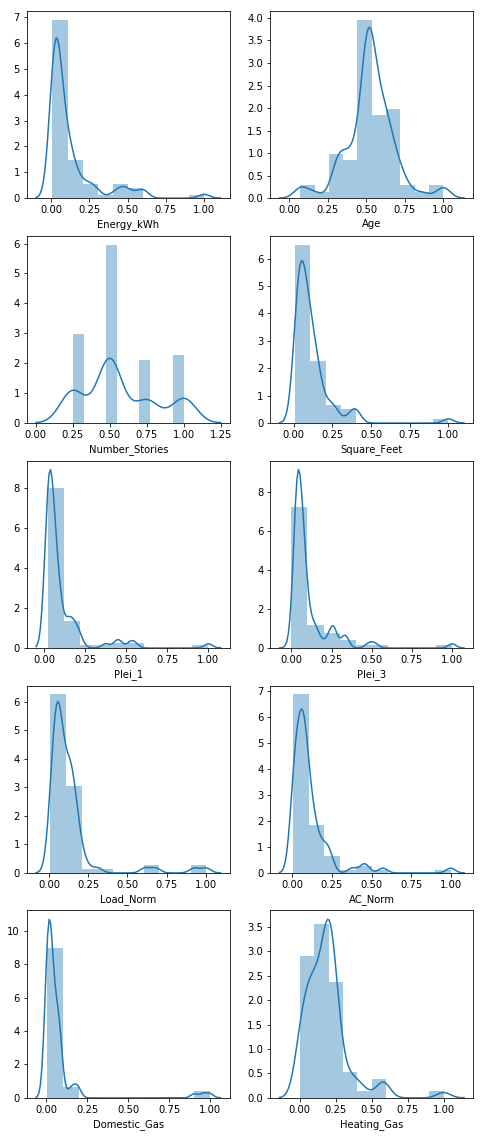

In [26]:
# Plot data distribution from DataFrame using the distribution plot of seaborn.
f, ax = plt.subplots(5,2,figsize=(8,20))
visu1 = sns.distplot(dfScaled['Energy_kWh'],bins=10, ax= ax[0][0])
visu2 = sns.distplot(dfScaled['Age'],bins=10, ax=ax[0][1])
visu3 = sns.distplot(dfScaled['Number_Stories'],bins=10, ax=ax[1][0])
visu4 = sns.distplot(dfScaled['Square_Feet'],bins=10, ax=ax[1][1])
visu5 = sns.distplot(dfScaled['Plei_1'],bins=10, ax=ax[2][0])
visu6 = sns.distplot(dfScaled['Plei_3'],bins=10, ax=ax[2][1])
visu7 = sns.distplot(dfScaled['Load_Norm'],bins=10, ax= ax[3][0])
visu8 = sns.distplot(dfScaled['AC_Norm'],bins=10, ax=ax[3][1])
visu9 = sns.distplot(dfScaled['Domestic_Gas'],bins=10, ax=ax[4][0])
visu10 = sns.distplot(dfScaled['Heating_Gas'],bins=10, ax=ax[4][1])

## 4.4. Pairwise Statistical Visualizations

Using seaborn, we plot pairwise relationships in our DataFrame with the 'pairplot' function.

By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 
The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

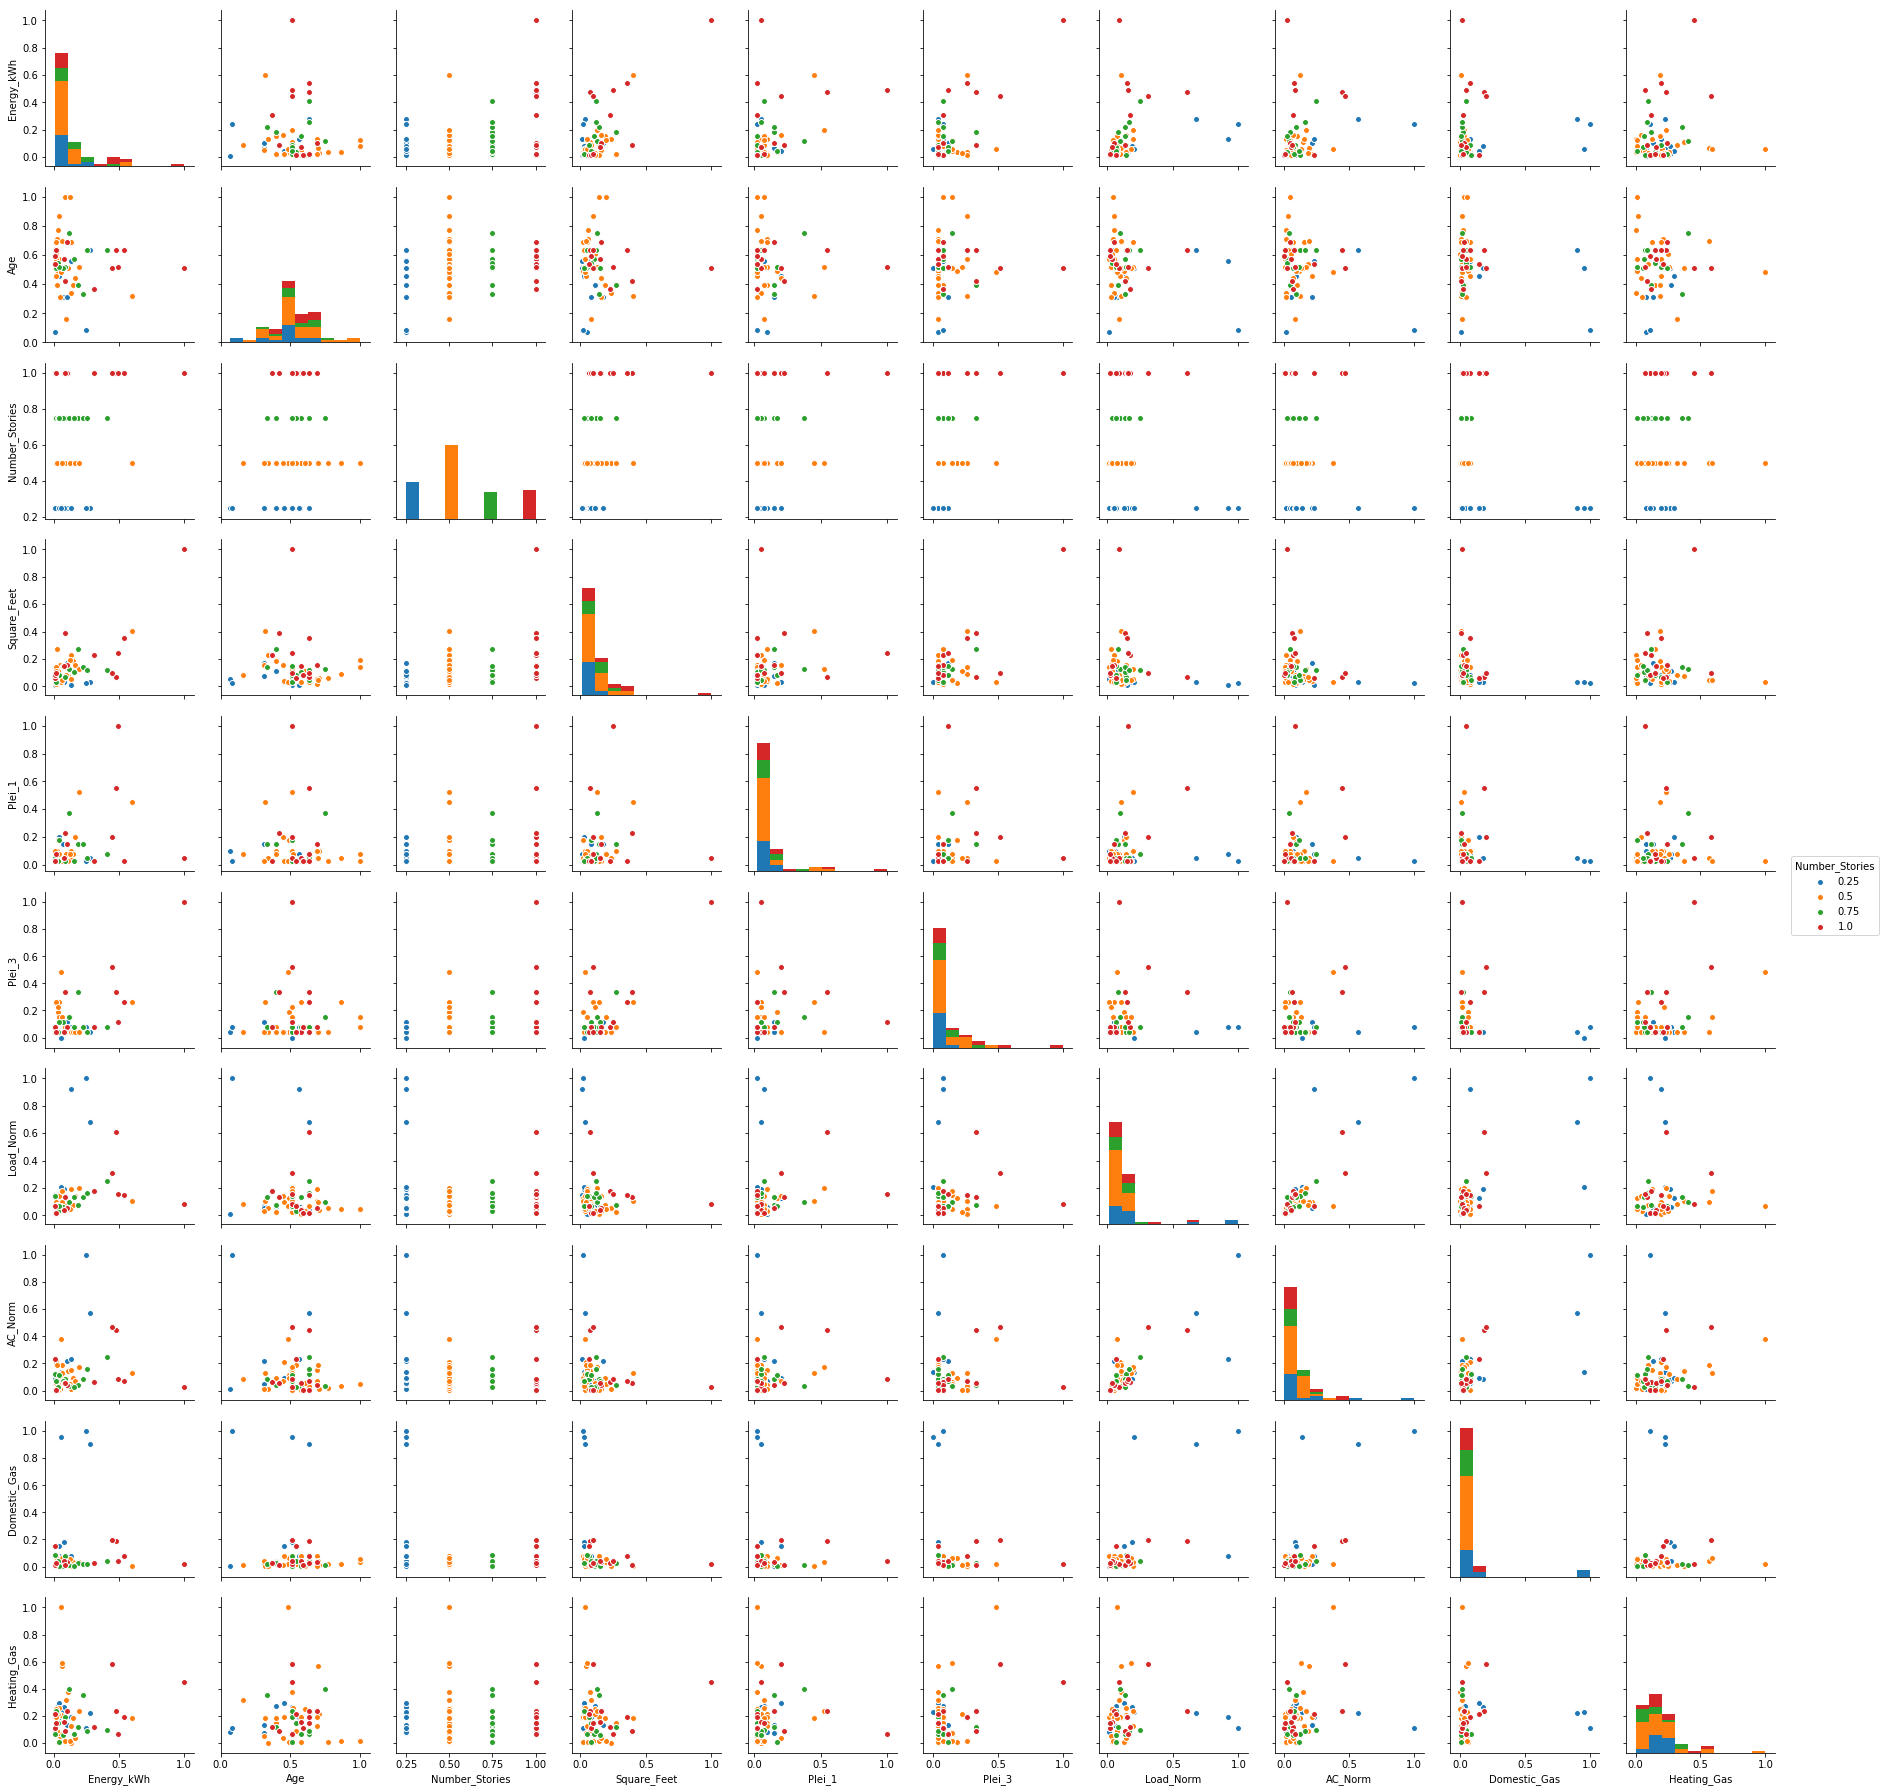

In [27]:
# Plot pairwise relationships in our DataFrame using 'pairplot' function.
sns.pairplot(dfScaled, hue='Number_Stories')

## 4.5. Other Statistical Visualizarions

We can also plot rectangular data as a color-encoded matrix using the 'heatmap' function from seaborn.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. 
Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

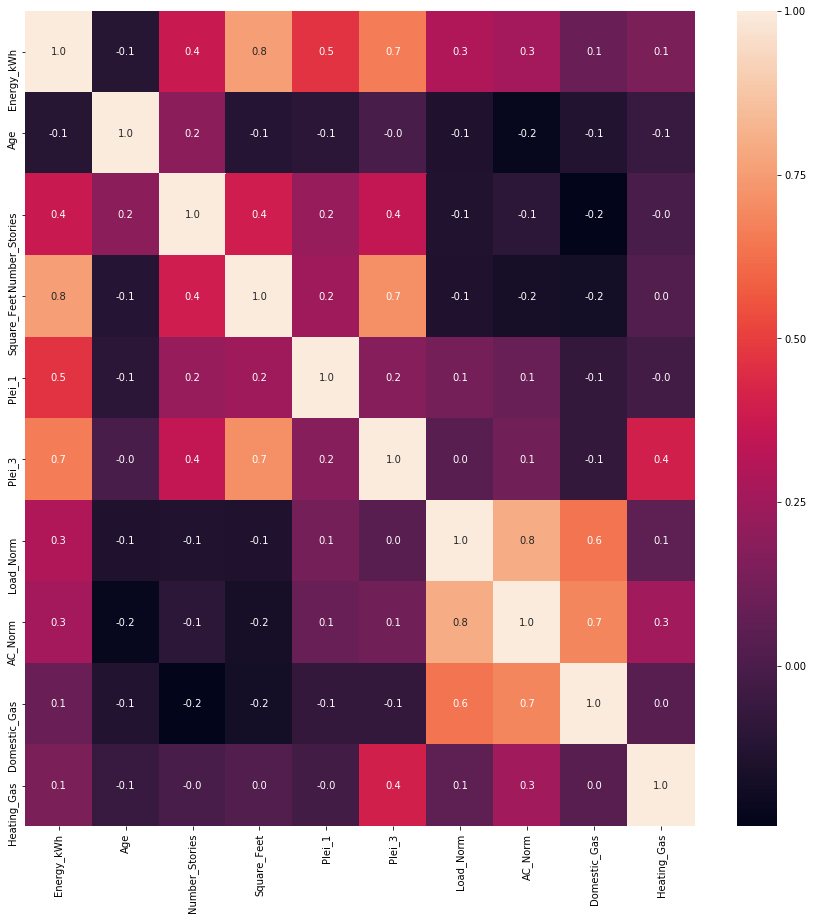

In [28]:
# Plot rectangular data as a color-encoded matrix using 'heatmap' function.
ax, fig = plt.subplots(figsize=(15, 15))
sns.heatmap(dfScaled.corr(), annot=True, fmt=".1f")

# 5. Regression Model (Ali)

In [30]:
# Import regression solver
from sklearn import linear_model

In [29]:
# Get a list of the features used to explain energy
features = dfScaled.columns.tolist()
response = ['Energy_kWh']
features.remove(response[0])

In [31]:
# Declare a linear regression model 
lr = linear_model.LinearRegression(fit_intercept=True)

In [32]:
# Define response variable: energy usage
y = np.asarray(dfScaled[response]) 

In [33]:
# Define features
X = dfScaled[features]

In [34]:
# Fit regression model to the data
regr = lr.fit(X,y)
coefs = regr.coef_[0]

In [35]:
# Collect regression coefficients
dataRegQ = []
dataRegQ.append(('Intercept', regr.intercept_[0]))
for i in range(len(features)):
    dataRegQ.append((features[i],coefs[i]))

In [36]:
# Compute energy predictions using our fitted model     
yh = regr.predict(X)

In [37]:
# Import package to compute the R-squared quality metric
from sklearn.metrics import r2_score

In [39]:
# Print results
print ('R-Squared: ', r2_score(y,yh))
pd.DataFrame(dataRegQ,columns=['Feature_Name','Coefficient']) #.head()

R-Squared:  0.8148086777306895


,Feature_Name,Coefficient
0,Intercept,-0.144027
1,Age,0.066229
2,Number_Stories,0.043700
3,Square_Feet,0.939022
4,Plei_1,0.258915
5,Plei_3,0.022835
6,Load_Norm,0.245344
7,AC_Norm,0.225375
8,Domestic_Gas,-0.021962
9,Heating_Gas,0.079262


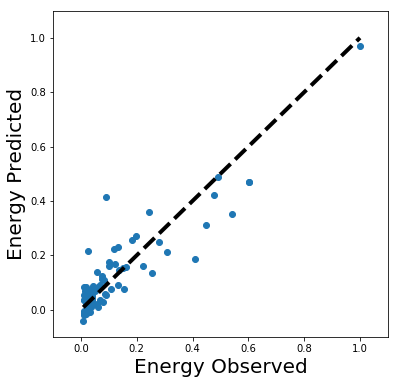

In [40]:
fig, ax = plt.subplots()
ax.scatter(y, yh)
#print(y)
#print(yh)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Energy Observed',fontsize=20)
ax.set_ylabel('Energy Predicted',fontsize=20)
ax.axis([-0.1, 1.1, -0.1, 1.1])
plt.gcf().set_size_inches( (6, 6) )
fig.savefig('linear-regression.png')
plt.show()

# 5. Regression Model (YA)

In [41]:
# import regression model 
from sklearn.linear_model import LinearRegression
import patsy
from sklearn.cross_validation import train_test_split

C:\Users\Yves-Andre\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


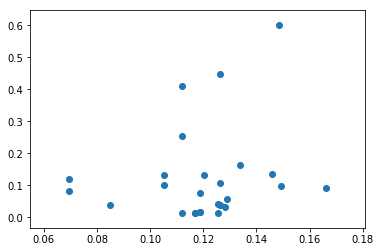

In [42]:
# Define 'formula'
formula = 'Energy_kWh ~ Age'

# Making your X matrix and Yhat matrix
y, x = patsy.dmatrices(formula, data=dfScaled)

# Creating Train and test data with a 33% of total test size
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.33)

# Extentiate/initialize linear regression
linreg = LinearRegression()

# Fitting model with train data
linreg.fit(xtrain, ytrain)

# Testing model on 33% of total data that it(model) hasn't seen before
linreg.score(xtest, ytest)

# Creating predictions given the fit
pred = linreg.predict(xtest)

# Visualizing the model predictions against the true data
plt.scatter(pred, ytest)